<a href="https://colab.research.google.com/github/jnremachaGH/hello-world/blob/master/Python_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.studyinternational.com/wp-content/uploads/2020/10/IE-University-logo-1.png">
 

---


## Group Project: Risk Analytics
 
Group B members:

1.   List item
2.   List item
3.   List item
4.   List item
5.   List item


 
---

# 1. Introduction



### 1.1 Dataset
This dataset contains information on customers and their risk scores. 


### 1.2 Data Dictionary
Variable | Description | Type of Variable
:----------: | ---------- | ----------
orgCode | Continuous | Organization code  
branchCode | Continuous | Branch code 
fullaccount | Continious | Customer account number
customerId | Continuous | Unique customer id  
customerType | Categorical | customer type (1= indiviual, 2=Entity)  
creationDate | Continuous | Date when customer account was created
onboarding | Categorical | Customer on-boarding Status (Y=Yes, N=No)
residentStatus | Categorical | Country esidential status (1=Resident, 2=Non-Resident)
residentCountry | Categorical | Customer residential country (List of countries)
nationalityOriginal | Categorical | Customer nationality (List of countries) 
extraNationality | Categorical | Customer 2nd nationality (List of countries) 
dateOfBirth | Continuous | Customer birth date
age_in_year | Continuous | Customer Age
birthCountry | Categorical | Customer birth country
birthPlace | Categorical | Customer birth city
profession | Categorical | Customer current job
companyType | Categorical | Customer current company he/she works at
giinCode | Categorical | ???
lastUpdate | Categorical | Date when customer information was last updated
status | Categorical | Customer account current status (Active or Inactive)
ledgerCode | Categorical | (Segerate sheet)
accountCurrency | Categorical | (Segerate sheet)
jointAccount | Categorical | Joint account type indicator (1=Join account, 0=Normal account)
IsBlackListed | Categorical | Account blacklisted indicator (1=Yes, 0=No)
CUS_CLASS | Categorical | Customer account class catagory
ECO_SEC | Categorical | Customer economic status 
TYPE_OF_DEP | Categorical | Department related catagories
GENDER | Categorical | Customer gender (1=male, 2=female)
LEGAL_STA_CODE | Categorical | Customer legal status
legal_Stat_desc | Categorical | Customer legal status description
avg_last_10_days | Continuous | Amount of previous 10 days
avg_last_30_days | Continuous | Amount of previous 30 days
avg_last_90_days | Continuous | Amount of previous 90 days
number_of_cash_dep_90_days | Continuous | Volume of cash deposit transactions made in the last 90 days
avg_cash_deposit_90_days | Continuous | Value of cash deposit transactions made in the last 90 days
number_of_deposit_90_days | Continuous | ???
avg_of_dep_90_days | Continuous | ???
number_of_cash_wd_90_days | Continuous | Volume of cash withdrawals transactions made in the last 90 days
avg_of_cash_wd_90_days | Continuous | Average value of cash withdrawals transactions made in the last 90 days
number_of_wd_90_days | Continuous | ???
avg_of_wd_90_days | Continuous | ???
date_of_assessment | Continuous | Assessment date
rbaGradeAbrv | Categorical | RBA greade abbreviation (L=Low ,M=Medium ,H=High)
Risk_Description | Categorical | Risk catagory (L=Low ,M=Medium ,H=High)
score_Card | Continuous | Risk score
rbaValue | Continuous | RBA vlaue





# 2. Exploratory Data Analysis (EDA)

---



### 2.1 Load the python libraries

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

%matplotlib inline

In [ ]:
#Connet to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 Read and prepare the data set 

In [ ]:
desired_dtypes= {'org_code': str, 'branchCode': str, 'customerId': str, 'fullaccount': str, 'ledgerCode': str}

#Link path to notebook
path = "/content/drive/MyDrive/My Python/RBA_KYC_Accounts_ALL_Ids.csv"
df = pd.read_csv(path, sep=';', error_bad_lines=False, dtype=desired_dtypes)

#Rename columns to standardize formating
#df.rename(columns={'branchCode':'branch_Code', 'customerId': 'customer_Id', 'fullaccount': 'full_account', 'customerType': 'customer_Type', 'creationDate': 'creation_Date', 'residentStatus':'resident_Status', 'residentCountry':'resident_Country', 'nationalityOriginal':'nationality_Original', 'extraNationality': 'extra_Nationality', 'dateOfBirth': 'date_Of_Birth', 'birthCountry': 'birth_Country', 'birthPlace': 'birth_Place', 'companyType': 'company_Type', 'giinCode': 'giin_Code', 'lastUpdate': 'last_Update', 'ledgerCode': 'ledger_Code', 'accountCurrency': 'account_Currency', 'jointAccount': 'joint_Account', 'IsBlackListed': 'Is_Black_Listed', 'rbaGradeAbrv':'rba_Grade_Abrv', 'rbaValue':'rba_Value'}, inplace=True)
# In order not to lose leading zeros in numeric values need to import as string

#Make all column Names in lower-case
#df.rename(columns=lambda x: x.lower(), inplace=True)

# View the first rows in the df to check if the data was loaded correctly
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,001,201,020100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,001,202,020200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,001,202,020200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,001,202,020200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,001,202,020200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


### 2.3 Shape of the dataframe

In [ ]:
#Check the shape of the df
df.shape

(224868, 47)

### 2.4 Data types

In [ ]:
#Check the columns data 
df.dtypes.value_counts()

float64    17
int64      15
object     15
dtype: int64

### 2.5 Dataframe Info

In [ ]:
#Check the dataframe infromation 
df.info()

### 2.5 Identify and handle missing, inconsistent and incorrect values

A. Identify missing values using isnull()

B. Identify other hidden missing values (cell w/o info) not covered in isnull()

C. Identify dtype inconsistencies

D. Individual business rules inconsistencies

E. Relational business rules inconsistencies

## A. First we identify missing values using isnull()

In [ ]:
miss_pres=round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val=round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres]
miss_pres_val

score_card_Desc        100.00
lastUpdate             100.00
legal_Stat_desc        100.00
birthCountry           100.00
giinCode                99.99
extraNationality        99.20
profession              64.54
GENDER                  53.59
companyType             49.05
birthPlace               9.71
dateOfBirth              2.10
age_in_year              2.10
nationalityOriginal      1.53
LEGAL_STA_CODE           1.16
residentCountry          0.27
dtype: float64

We remove columns with % missing values above 99.5%

*Need to decide if rows are to be deleted here or later, or what criteria?*

In [ ]:
for x in miss_pres_val.index:
    if float(miss_pres_val[x])>=99.5:
        x
        df=df.drop(columns=[x])

We check at this step that output is as desired

In [ ]:
miss_pres=round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val=round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres]
print(miss_pres_val)

extraNationality       99.20
profession             64.54
GENDER                 53.59
companyType            49.05
birthPlace              9.71
dateOfBirth             2.10
age_in_year             2.10
nationalityOriginal     1.53
LEGAL_STA_CODE          1.16
residentCountry         0.27
dtype: float64


## B. Identify other non-obvious missing values (cell w/o info) not covered in 

*   Elemento de lista
*   Elemento de lista

isnull()

In [ ]:
basic_info    = {'org_code':                   ['str','([0-9\s]+)'], 
                 'branchCode':                 ['str','([0-9\s]+)'], 
                 'customerId':                 ['str','([0-9\s]+)'], 
                 'fullaccount':                ['str','([0-9\s]+)'],
                 'customerType':               ['int','([0-9\s]+)'],
                 'creationDate':               ['datetime','([0-9\s]+)'],
                 'onboarding':                 ['str','([a-zA-Z\s]+)'],
                 'residentStatus':             ['int','([0-9\s]+)'],
                 'residentCountry':            ['str','([a-zA-Z\s]+)'],
                 'nationalityOriginal':        ['str','([a-zA-Z\s]+)'],
                 'extraNationality':           ['str', '([a-zA-Z\s]+)'],
                 'dateOfBirth':                ['datetime', '([0-9\s]+)'],
                 'age_in_year':                ['int', '([0-9\s]+)'],
#                 'birthCountry':               ['str', '([a-zA-Z\s]+)'],
                 'birthPlace':                 ['str', '([a-zA-Z\s]+)'],
                 'profession':                 ['int', '([0-9\s]+)'],
                 'companyType':                ['int', '([0-9\s]+)'],
#                 'giinCode':                   ['str', '([a-zA-Z0-9\s]+)'],
                 'lastUpdate':                 ['str', '([0-9\s]+)'],
                 'status':                     ['str', '([a-zA-Z\s]+)'],
                 'ledgerCode':                 ['int', '([0-9\s]+)'],
                 'accountCurrency':            ['str', '([a-zA-Z\s]+)'],
                 'jointAccount':               ['int', '([0-9\s]+)'],
                 'IsBlackListed':              ['int', '([0-9\s]+)'],
                 'CUS_CLASS':                  ['int', '([0-9\s]+)'],
                 'ECO_SEC':                    ['int', '([0-9\s]+)'],
                 'TYPE_OF_DEP':                ['int', '([0-9\s]+)'],
                 'GENDER':                     ['int','([0-9\s]+)'],
                 'LEGAL_STA_CODE':             ['int', '([0-9\s]+)'],
#                 'legal_Stat_desc':            ['str', '([a-zA-Z\s]+)'],
                 'avg_last_10_days':           ['float','([0-9\s]+)'],
                 'avg_last_30_days':           ['float','([0-9\s]+)'],
                 'avg_last_90_days':           ['float', '([0-9\s]+)'],
                 'number_of_cash_dep_90_days': ['int','([0-9\s]+)'],
                 'avg_cash_deposit_90_days':   ['int', '([0-9\s]+)'],
                 'number_of_deposit_90_days':  ['int','([0-9\s]+)'],
                 'avg_of_dep_90_days':         ['float', '([0-9\s]+)'],
                 'number_of_cash_wd_90_days':  ['int','([0-9\s]+)'],
                 'avg_of_cash_wd_90_days':     ['float', '([0-9\s]+)'],
                 'number_of_wd_90_days':       ['int', '([0-9\s]+)'],
                 'avg_of_wd_90_days':          ['float','([0-9\s]+)'],
                 'date_of_assessment':         ['datetime','([0-9\s]+)'],
                 'rbaGradeAbrv':               ['str', '([a-zA-Z\s]+)'],
                 'rba_grade_desc':             ['str', '([a-zA-Z\s]+)'],
                 'score_card':                 ['str','([a-zA-Z\s]+)'],
#                 'score_card_Desc':            ['str', '([a-zA-Z\s]+)'],
                 'rbaValue':                   ['float','([0-9\s]+)']}


In [ ]:
MaskA=df.isnull() # Mask A for na values detected with isna()
MaskB=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask B for unveiling cells with no info

for y in range(df.shape[1]):
    binf=basic_info.get(df.columns[y])[1]
    masknull=pd.Series("",index=df.index)
    bb = (df.iloc[:,y].astype(str)).str.extract(binf,expand=False).str.strip()
    maskbb=(bb==masknull)
    MaskB.iloc[:,y] = maskbb|bb.isna()

MaskB[MaskA]=False


miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("******************************************************************")
print("Type 1. % Missing values NaN")
print("******************************************************************")
print(miss_pres_val_A)

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("******************************************************************")
print("Type 2. % Missing info, no relevant character, excluding Missing")
print("******************************************************************")
print(miss_pres_val_B)

******************************************************************
Type 1. % Missing values NaN
******************************************************************
birthPlace             99.38
extraNationality       99.20
profession             64.54
GENDER                 53.59
companyType            49.05
dateOfBirth             2.10
age_in_year             2.10
nationalityOriginal     1.53
LEGAL_STA_CODE          1.16
residentCountry         0.27
dtype: float64
******************************************************************
Type 2. % Missing info, no relevant character, excluding Missing
******************************************************************
Series([], dtype: float64)


In [ ]:
df[MaskB]=np.nan

MaskA=df.isnull() # Mask A for na values detected with isna()
MaskB=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask B for unveiling cells with no info

for y in range(df.shape[1]):
    binf=basic_info.get(df.columns[y])[1]
    bb = (df.iloc[:,y].astype(str)).str.extract(binf,expand=False).str.strip()
    MaskB.iloc[:,y] = bb.isna()

MaskB[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("******************************************************************")
print("Type 1. % Missing values NaN")
print("******************************************************************")
print(miss_pres_val_A)

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("******************************************************************")
print("Type 2. % Missing info, no number/letter")
print("******************************************************************")
print(miss_pres_val_B)

df.head()

******************************************************************
Type 1. % Missing values NaN
******************************************************************
birthPlace             99.38
extraNationality       99.20
profession             64.54
GENDER                 53.59
companyType            49.05
dateOfBirth             2.10
age_in_year             2.10
nationalityOriginal     1.53
LEGAL_STA_CODE          1.16
residentCountry         0.27
dtype: float64
******************************************************************
Type 2. % Missing info, no number/letter
******************************************************************
Series([], dtype: float64)


,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthPlace,profession,companyType,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,rbaValue
0,001,201,020100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,35.0,Active,5817,JOD,0,0,4,46,35,NaN,2.0,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,13.20
1,001,202,020200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,27.0,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,16.93
2,001,202,020200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,27.0,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,16.93
3,001,202,020200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,27.0,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,16.93
4,001,202,020200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,27.0,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,16.93


In [ ]:
df['birthPlace'].value_counts()

BAGHDAD       66
JORDAN        45
BAGDAD        39
LARKANA       37
PUNJAB        26
              ..
JAKARTA        1
SASKATOON      1
LAKSHMIPUR     1
amos can       1
MEGOMBO        1
Name: birthPlace, Length: 511, dtype: int64

## C. Detect the value cells that cannot be cast into desired dtype

In [ ]:

MaskA=df.isnull() # Mask A for na values detected with isna()
MaskB=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask B for unveiling cells with no info
MaskC=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask C for detecting inconsistent cells with desired dtype

for y in range(df.shape[1]):
    binftype=basic_info.get(df.columns[y])[0]
    if binftype == 'int':
        col_num=pd.to_numeric(df.iloc[:,y],errors='coerce', downcast='integer')
        MaskC.iloc[:,y] = col_num.isna()
    elif binftype == 'float':
        col_num=pd.to_numeric(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = col_num.isna()
    elif binftype == 'datetime':
        col_num=pd.to_datetime(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = col_num.isna()

MaskC[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("******************************************************************")
print("Type 1. % Missing values NaN")
print("******************************************************************")
print(miss_pres_val_A)

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("******************************************************************")
print("Type 2. % Missing info, no number/letter")
print("******************************************************************")
print(miss_pres_val_B)

miss_pres_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_C]
print("******************************************************************")
print("Type 3. % Inconsistent datatype (excluding NaN that cannot be casted in int type)")
print("******************************************************************")
print(miss_pres_val_C)



******************************************************************
Type 1. % Missing values NaN
******************************************************************
birthPlace             99.38
extraNationality       99.20
profession             64.54
GENDER                 53.59
companyType            49.05
dateOfBirth             2.10
age_in_year             2.10
nationalityOriginal     1.53
LEGAL_STA_CODE          1.16
residentCountry         0.27
dtype: float64
******************************************************************
Type 2. % Missing info, no number/letter
******************************************************************
Series([], dtype: float64)
******************************************************************
Type 3. % Inconsistent datatype (excluding NaN that cannot be casted in int type)
******************************************************************
Series([], dtype: float64)


In [ ]:

for y in range(df.shape[1]):
    binftype=basic_info.get(df.columns[y])[0]
    if binftype == 'int':
        df.iloc[:,y]=pd.to_numeric(df.iloc[:,y],errors='coerce', downcast='integer')
        MaskC.iloc[:,y] = df.iloc[:,y].isna()
    elif binftype == 'float':
        df.iloc[:,y]=pd.to_numeric(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = df.iloc[:,y].isna()
    elif binftype == 'datetime':
        df.iloc[:,y]=pd.to_datetime(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = df.iloc[:,y].isna()

MaskC[MaskA]=False
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224868 entries, 0 to 224867
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   org_code                    224868 non-null  object        
 1   branchCode                  224868 non-null  object        
 2   customerId                  224868 non-null  object        
 3   fullaccount                 224868 non-null  object        
 4   customerType                224868 non-null  int8          
 5   creationDate                224868 non-null  datetime64[ns]
 6   onboarding                  224868 non-null  object        
 7   residentStatus              224868 non-null  int8          
 8   residentCountry             224272 non-null  object        
 9   nationalityOriginal         221429 non-null  object        
 10  extraNationality            1793 non-null    object        
 11  dateOfBirth                 220153 non-

## D. Individual Business Rules

In this step we make sure that not only the cells are not missing values, can have any potential relevant info, can be casted into the desired type
but also that certain columns that follow business rules are compliant with those
(For example, an account number needs to have certain number of only digits)
A dictionary of business rules is created (bus_rules_ind) that includes:
a) number of characters & b) exclusive type of characters
Our method checks if the actual length with only allowed characters match rule

In [ ]:
bus_rules_ind = {'org_code':            [3,'([0-9\s]+)'],
                'branchCode':           [3,'([0-9\s]+)'],
                'customerId':           [18, '([0-9\s]+)'],
                'fullaccount':          [21, '([0-9\s]+)'],
                'customerType':         [1, '([1-2\s]+)'],
                'birthPlace':           [0,'([a-zA-Z\s]+)'],
                'residentStatus':       [1, '([1-2\s]+)'],
                'residentCountry':      [2, '([A-Z\s]+)'],
                'nationalityOriginal':  [2, '([A-Z\s]+)'],
                'extraNationality':     [2, '([A-Z\s]+)'],
                'accountCurrency':      [3, '([A-Z\s]+)'],
                'jointAccount':         [1, '([0-1\s]+)']}


In [ ]:
MaskD=pd.DataFrame(False,index=df.index, columns=df.columns)

for key in bus_rules_ind:

    MaskDdummy=pd.Series(True,index=df.index)
    za=((df[key]).astype(str))
    zb=za.str.extract(bus_rules_ind.get(key)[1],expand=False).str.strip()
    zextr_len=zb.str.len()
    z_len=(df[key].astype(str)).str.len()
    if bus_rules_ind.get(key)[0] == 0:
        a = ((zextr_len > 0) & (z_len > 0))
        MaskDdummy[a] = False
        MaskD[key]=MaskDdummy
    else:   
        a = ((bus_rules_ind.get(key)[0] == zextr_len) & (bus_rules_ind.get(key)[0] == z_len))
        MaskDdummy[a] = False
        MaskD[key]=MaskDdummy
          
MaskD[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("******************************************************************")
print("Type 1. % Missing values NaN")
print("******************************************************************")
print(miss_pres_val_A)

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("******************************************************************")
print("Type 2. % Missing info, no number/letter")
print("******************************************************************")
print(miss_pres_val_B)

miss_pres_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_C]
print("******************************************************************")
print("Type 3. % Inconsistent datatype (excluding NaN that cannot be casted in int type)")
print("******************************************************************")
print(miss_pres_val_C)

miss_pres_D=round(MaskD.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_D=round(MaskD.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_D]
print("******************************************************************")
print("Type 4. % Not compliant with individual business rules for each col")
print("******************************************************************")
print(miss_pres_val_D)



******************************************************************
Type 1. % Missing values NaN
******************************************************************
birthPlace             99.38
extraNationality       99.20
profession             64.54
GENDER                 53.59
companyType            49.05
dateOfBirth             2.10
age_in_year             2.10
nationalityOriginal     1.53
LEGAL_STA_CODE          1.16
residentCountry         0.27
dtype: float64
******************************************************************
Type 2. % Missing info, no number/letter
******************************************************************
Series([], dtype: float64)
******************************************************************
Type 3. % Inconsistent datatype (excluding NaN that cannot be casted in int type)
******************************************************************
Series([], dtype: float64)
******************************************************************
Type 4. % Not compli

## Next step is to visualize those non-compliant in order to learn what action to take next 

In [ ]:
df['customerId'][MaskD['customerId']].value_counts()

02060022929    513
02030067177     28
07040042919     25
03510091899     18
08030022658     15
              ... 
02080041818      1
04010092873      1
04020096586      1
06010048535      1
08010079378      1
Name: customerId, Length: 1344, dtype: int64

## E. Relational Business Rules

In [ ]:
#df["creationDate"]=df["creationDate"].astype('datetime64[ns]')
#df['dateOfBirth']=df['dateOfBirth'].astype('datetime64[ns]')
error1=df['creationDate']<df['dateOfBirth']
print("The ERROR 1 applies to "+ str(error1.sum())+ " rows, suggesting to delete these rows.")


The ERROR 1 applies to 2718 rows, suggesting to delete these rows.


In [ ]:
dfnalisha1 = df.copy()

list((dfnalisha1['creationDate']<dfnalisha1['dateOfBirth']).index)


#dfnalisha1[error1].drop()
#dfnalisha1.drop(dfnalisha1['creationDate']<dfnalisha1['dateOfBirth']).index, inplace = True)
#dfnalisha1.drop((dfnalisha1['creationDate']<dfnalisha1['dateOfBirth']).index, axis=0, inplace = True)
#dfnalisha1.shape

#dfnalisha2 = dfnalisha1.drop(dfnalisha1['creationDate']<dfnalisha1['dateOfBirth']).index, inplace = True)

#dfnalisha2.shape

#da.drop(list(df.index[df.index==1]),axis=0)

dfnalisha1.drop(list(dfnalisha1.index[dfnalisha1['creationDate']<dfnalisha1['dateOfBirth']]),axis=0, inplace=True)

error1a=dfnalisha1['creationDate']<dfnalisha1['dateOfBirth']
print("The ERROR 1 applies to "+ str(error1a.sum())+ " rows, suggesting to delete these rows.")
dfnalisha1.shape

The ERROR 1 applies to 0 rows, suggesting to delete these rows.


(222150, 42)

###F. Duplicated information in rows and columns containing unique values

In [ ]:
df.duplicated().sum()

0

In [ ]:
infodf=pd.DataFrame(False, index=[1],columns=df.columns)
for x in df.columns:
    infodf[x]=len(df[x].unique())
infodf==1
infodf[infodf==1].T

,1
org_code,1.0
branchCode,NaN
customerId,NaN
fullaccount,NaN
customerType,NaN
creationDate,NaN
onboarding,NaN
residentStatus,NaN
residentCountry,NaN
nationalityOriginal,NaN




## 2.5.4. Individual Business Rules Compliance
In this step we ensure that business rules are applied to treat missing/error data values and make decisions to keep or remove certain variables based on data quality and available data sources. In additions, the selected variables are treated with appropriate data type and format based on the bussiness rules.


**ERROR 1: Check dateOfBirth & creationDATE**
        <br>Rule 1.1: Account cannot be created before the person/entity's dateOfBirth.
        <br>Action 1.1: convert creationDate and dateOfBirth into Datetime, remove those creationDate < dateOfBirth
        
**ERROR 2: Customer Type - "DEMOGRAPHIC" profiling for individuals and entities**
        <br>Rule 2.1: For the same "customerId", there is a consistently same customer type
        <br>Action 2.1: Identify inconsistant "customerId" and treat accordingly based on "DEMOGRAPHIC" features; remove customerId if profiling is not clear.
        <br>
        <br>Rule 2.2: 
        <br>- For each individual ("customerType"=1), there is a consistently same Gender/Profession, 
                    a N/A company type, a non-null birthOfDate;
        <br>- For each entity ("customerType"=2), there is a N/A Gender/Profession, non-Null company type.
        <br>
        <br>Action 2.2: Modify customer type based on valid demographic profiles
                  <br>- If ENTITY who has a GENDER/PROFESSION,a N/A company type, a Non-null birthOfDate:
                    <br>Treat an Entity as "Individual"
                  <br>
                  <br>- If INDIVIDUAL who has a N/A GENDER/PROFESSION, a Non-null company type:
                    <br>Treat it as an ENTITY
                  <br>
                  <br>- If ENTITY or Individual who has a NULL in all relevant demographic descriptive variables
                    <br>Remove
                    
 <br>**Business Rule 1: Based on RBA Metadata.xlsx and % missing values**, 
          <br>
          <br>The following variables are **critical** to RBA ratings:
                  <br>- "accountCurrency"
                 <br>- "residentCountry"
                  <br>- "ledgerCode"
                  <br>- "profession"
                 <br>- "CUS_CLASS"
                  <br>- "ECO_SEC"
                  <br>- "TYPE_OF_DEP"
                  <br>- "LEGAL_STA_CODE"
          <br>
          <br>The following variables to **delete**:
                  <br>- "lastUpdate"
                  <br>- "legal_Stat_desc"
                  <br>- "score_card_Desc"
                  <br>- "birthCountry"
                  <br>- "giinCode"
                  <br>- "extraNationality"
                  
<br>**Business Rule 2: right formats for variables: ex. an account number must have a certain number of digits** 
<br>A dictionary of formatting based on business rules is created (bus_rules_ind) to check:
    <br>a) number of characters & b) exclusive type of characters

## ERROR 1: Check dateOfBirth & creationDATE
**Logic for error data**: 
Account cannot be created before the person/entity's dateOfBirth.

**Action**: convert creationDate and dateOfBirth into Datetime, to identify those creationDate < dateOfBirth

In [ ]:
df[["creationDate",'dateOfBirth']]
df["creationDate"]=df["creationDate"].astype('datetime64[ns]')
df['dateOfBirth']=df['dateOfBirth'].astype('datetime64[ns]')
error1=df['creationDate']<df['dateOfBirth']
print("The ERROR 1 applies to "+ str(error1.sum())+ " rows, suggesting to delete these rows.")

# ERROR 2:  Customer Type - "DEMOGRAPHIC"
**First step**: check for the same "customerId", there is a consistant customer type.
Action: delete outliers.

**Logic for error data**: 
1.Identify ENTITY who has a GENDER/PROFESSION,a N/A company type, a Non-null birthOfDate
**Action**: Modify the customer type to individual

2.Identify INDIVIDUAL who has a N/A GENDER/PROFESSION, a Non-null company type
**Action**: Treat the customer as ENTITY

3.Identify ENTITY who has a NULL in all relevant demographic descriptive variables
**Action**: Delete



### 2.6 Summary statistics

In [ ]:
#Summary statistics for each column
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
org_code,224868.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
branch_code,224868.000000,448.451323,228.193308,201.000000,208.000000,401.000000,701.000000,805.000000
customer_id,224868.000000,43945028199706312.000000,23493213895082964.000000,2020027747.000000,20702070420002056.000000,40112048680007696.000000,70124099945000896.000000,80529290000003840.000000
customer_type,224868.000000,1.114418,0.318319,1.000000,1.000000,1.000000,1.000000,2.000000
resident_status,224868.000000,1.021221,0.144122,1.000000,1.000000,1.000000,1.000000,2.000000
age_in_year,220153.000000,41.310575,16.000536,1.000000,31.000000,41.000000,52.000000,119.000000
birth_country,0.000000,nan,nan,nan,nan,nan,nan,nan
profession,79748.000000,18.309487,6.586481,1.000000,20.000000,20.000000,21.000000,39.000000
company_type,114574.000000,49.857577,6.736115,1.000000,51.000000,51.000000,51.000000,100.000000
last_update,0.000000,nan,nan,nan,nan,nan,nan,nan


### 2.7 Number of unique variables in each column

In [ ]:
for col in df:
    print(col, df[col].nunique())

org_code 1
branch_code 30
customer_id 75339
full_account 220434
customer_type 2
creation_date 7041
onboarding 2
resident_status 2
resident_country 62
nationality_original 67
extra_nationality 35
date_of_birth 21457
age_in_year 106
birth_country 0
birth_place 1000
profession 32
company_type 33
giin_code 1
last_update 0
status 1
ledger_code 227
account_currency 20
joint_account 2
is_black_listed 1
cus_class 10
eco_sec 206
type_of_dep 51
gender 2
legal_sta_code 4
legal_stat_desc 0
avg_last_10_days 106519
avg_last_30_days 94287
avg_last_90_days 37665
number_of_cash_dep_90_days 151
avg_cash_deposit_90_days 5780
number_of_deposit_90_days 293
avg_of_dep_90_days 11215
number_of_cash_wd_90_days 45
avg_of_cash_wd_90_days 5348
number_of_wd_90_days 259
avg_of_wd_90_days 8674
date_of_assessment 1
rba_grade_abrv 3
rba_grade_desc 3
score_card 4
score_card_desc 0
rba_value 692


### 2.8 Target variable class imblance

In [ ]:
#Create new binary column for [rba_grade_desc]: Low as 0 and else 1 (Medium or High)
df['rba_risk_ind'] = df['rba_grade_desc'].apply(lambda x: 0 if x=='Low' else 1)

In [ ]:
# Check the count
df['rba_grade_desc'].value_counts() 

0         0
1         0
2         0
3         0
4         0
         ..
224863    0
224864    1
224865    0
224866    1
224867    1
Name: rba_risk_ind, Length: 224868, dtype: int64

In [ ]:
df['rba_risk_ind'].value_counts(normalize=True).mul(100)  

0    71.010548
1    28.989452
Name: rba_risk_ind, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


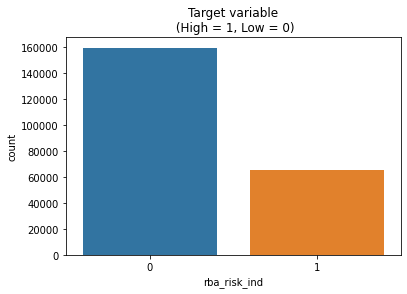

In [ ]:
ax = sns.countplot(df['rba_risk_ind'],
             );
ax.set_title('Target variable\n (High = 1, Low = 0)');

### 2.9 Explore other features

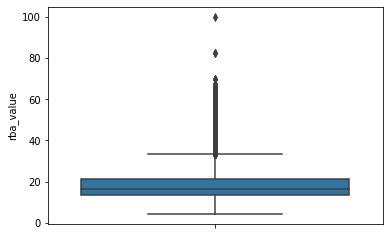

In [ ]:
#[rba_value] box-plot
sns.boxplot(y=df['rba_value']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


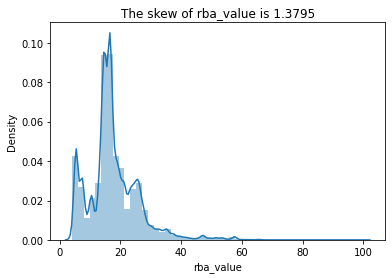

In [ ]:
# plot the distribution for [rba_value]
sns.distplot(df['rba_value'])
plt.title("The skew of rba_value is {:.4f}".format(df['rba_value'].skew()));

In [ ]:
#Exploring [gender]
df["gender"].value_counts()

1.0    78166
2.0    26191
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


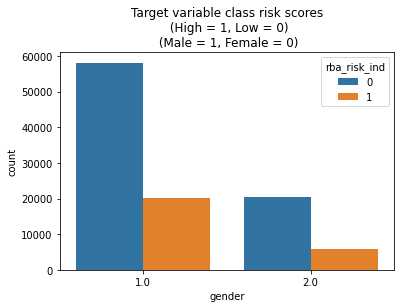

In [ ]:
#[Gender] vs [rba_risk_ind]
ax1 = sns.countplot(df['gender'], hue=df['rba_risk_ind']);
ax1.set_title('Target variable class risk scores\n (High = 1, Low = 0)\n (Male = 1, Female = 0)');

In [ ]:
#Exploring [customer_type]
df["customer_type"].value_counts()

1    199139
2     25729
Name: customer_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


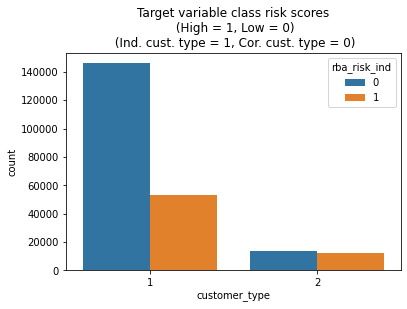

In [ ]:
#[customer_type] vs [rba_risk_ind]
ax1 = sns.countplot(df['customer_type'], hue=df['rba_risk_ind']);
ax1.set_title('Target variable class risk scores\n (High = 1, Low = 0)\n (Ind. cust. type = 1, Cor. cust. type = 0)');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


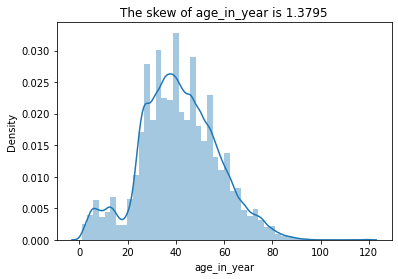

In [ ]:
# plot the distribution for [rba_value]
sns.distplot(df['age_in_year'])
plt.title("The skew of age_in_year is {:.4f}".format(df['rba_value'].skew()));

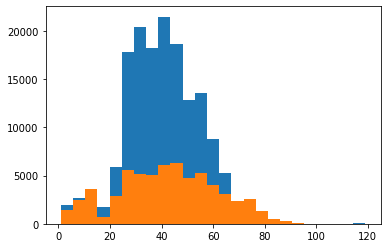

In [ ]:
#[age_in_year] Histogram grouped by [rba_risk_ind]
df.groupby('rba_risk_ind').age_in_year.hist(grid=False, bins=25);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


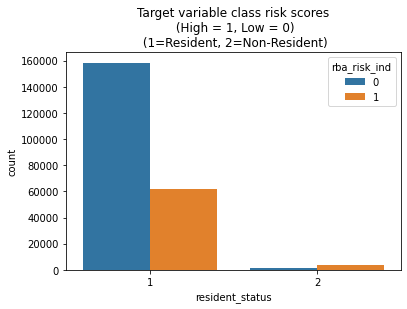

In [ ]:
#[resident_Status] vs [rba_risk_ind]
ax1 = sns.countplot(df['resident_status'], hue=df['rba_risk_ind']);
ax1.set_title('Target variable class risk scores\n (High = 1, Low = 0)\n (1=Resident, 2=Non-Resident)');


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


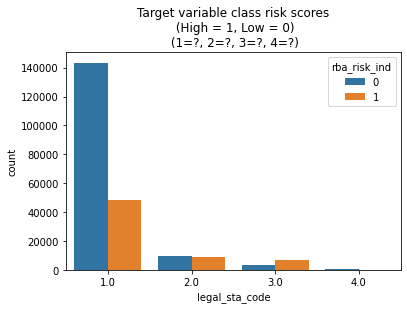

In [ ]:
#[legal_sta_code] vs [rba_risk_ind]
ax1 = sns.countplot(df['legal_sta_code'], hue=df['rba_risk_ind']);
ax1.set_title('Target variable class risk scores\n (High = 1, Low = 0)\n (1=?, 2=?, 3=?, 4=?)');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


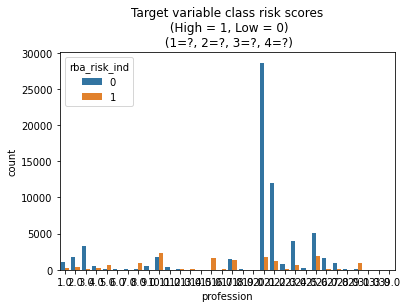

In [ ]:
#[profession] vs [rba_risk_ind]
ax1 = sns.countplot(df['profession'], hue=df['rba_risk_ind']);
ax1.set_title('Target variable class risk scores\n (High = 1, Low = 0)\n (1=?, 2=?, 3=?, 4=?)');


### 2.10 Correlation matrix for possible features

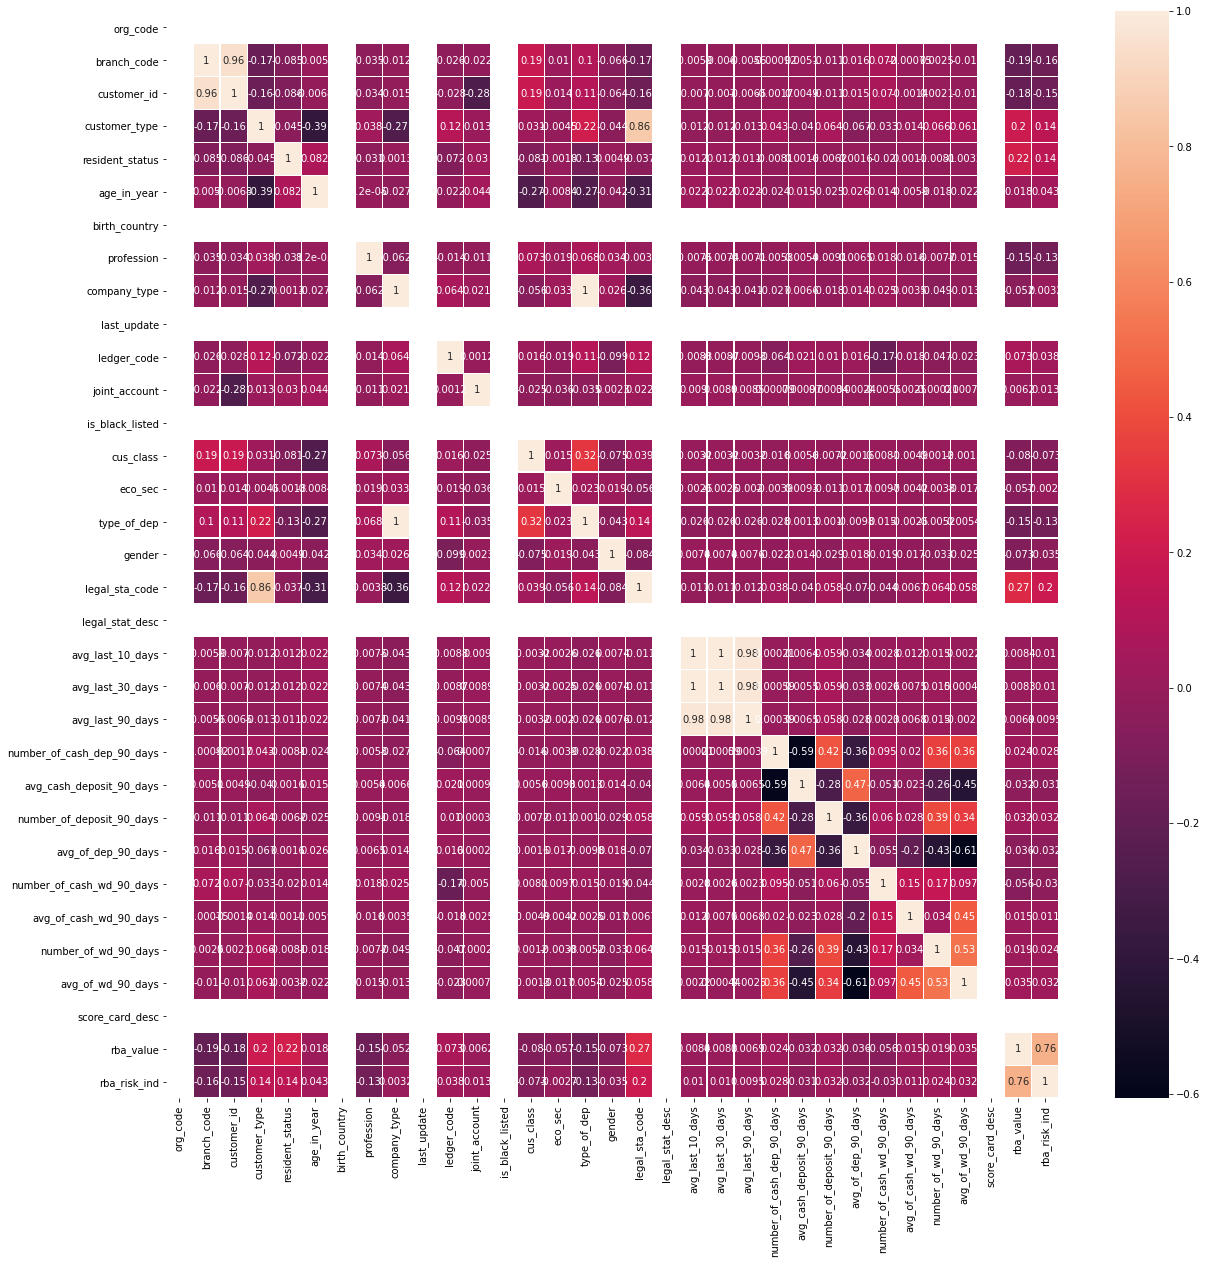

In [ ]:
#Visualize the correlation matrix
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidth=0.2, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True);

# 3. Data Modeling
---


In [ ]:
For translating the data I have found a code that works, try it out by downloading this library. # https://www.thepythoncode.com/article/translate-text-in-python

!pip install googletrans==3.1.0a0

In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=547ac64bfb89938f907991d0ba0c85511500f012c7223b108d651d99efe105e7
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:
from googletrans import Translator # import Translator

In [ ]:
translator = Translator() # initalize the Translator object

In [ ]:
path_metadata = "/content/drive/MyDrive/My Python/Group Assignment/RBA Metadata.xlsx"
kyc = pd.read_excel(path_metadata,dtype=str) # call the dataset
# dataset has arabic in column 'Description'

In [ ]:
kyc['Translation']=kyc['Description'].apply(translator.translate, src='arabic', dest='en').apply(getattr, args=('text',))
# this should translate the input in the Description column and add a new one. I tested it and worked. There are more sheets that need also merging and translation.